In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
heart = pd.read_csv("heart.csv")

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
heart.describe()
#get summary statistics for each column

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


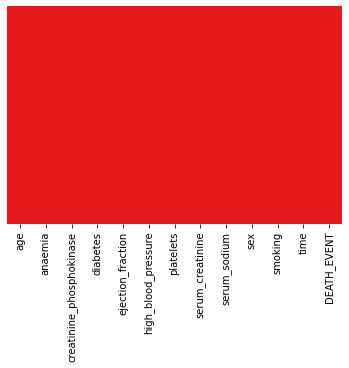

In [8]:
#EDA
#Check Null Value in Dataset
sns.heatmap(data = heart.isnull(),yticklabels=False,cmap = "Set1",cbar=False)

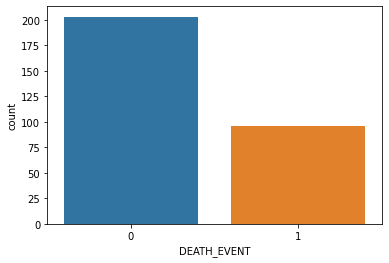

In [23]:
sns.countplot(x = "DEATH_EVENT",data = heart)

In [7]:
# develop a function that can calculate the influence of our dummy variables to the mortality rate
# the result has obviously different mortality rate can be considered as a useful variable. 
def death_rate(data,variable):
    df = data[['DEATH_EVENT',variable]]
    count = df.groupby(variable).count()
    death = df.groupby(variable).sum()
    result = death/count
    return result

In [8]:
print(death_rate(heart,'anaemia'))
print(death_rate(heart,'diabetes'))
print(death_rate(heart,'high_blood_pressure'))
print(death_rate(heart,'sex'))
print(death_rate(heart,'smoking'))

         DEATH_EVENT
anaemia             
0           0.294118
1           0.356589
          DEATH_EVENT
diabetes             
0            0.321839
1            0.320000
                     DEATH_EVENT
high_blood_pressure             
0                       0.293814
1                       0.371429
     DEATH_EVENT
sex             
0       0.323810
1       0.319588
         DEATH_EVENT
smoking             
0           0.325123
1           0.312500


Patients having anaemia and high_blood_pressure show a higher mortality rate, based on this we can do further research.

In [9]:
#add the 2 dummy variables "anaemia" and "high_blood_pressure", the result shows patients having both
#have a higher mortality rate.
heart['anaemia_high_blood'] = heart['anaemia'] + heart['high_blood_pressure']
test = heart[['DEATH_EVENT','anaemia_high_blood']]
print(test.groupby('anaemia_high_blood').sum()/test.groupby('anaemia_high_blood').count())

                    DEATH_EVENT
anaemia_high_blood             
0                      0.265487
1                      0.340580
2                      0.395833


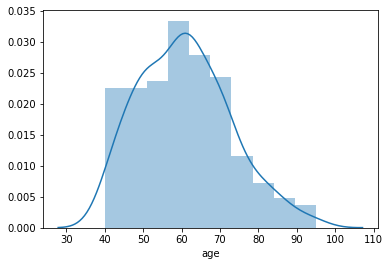

In [12]:
#check age distribution in data
sns.distplot(heart.age)

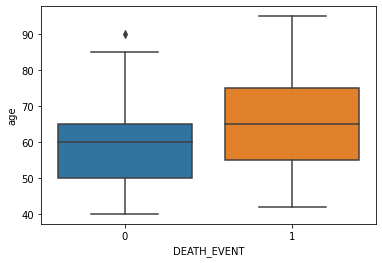

In [13]:
#Using boxplot to check the influence of age
sns.boxplot(x= "DEATH_EVENT",y = "age",data=heart)

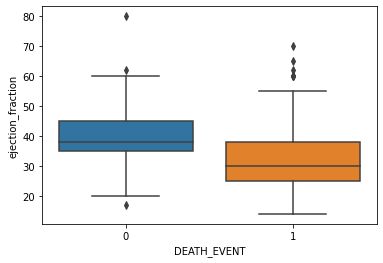

In [14]:
#the effect of ejection_fraction
sns.boxplot(x = "DEATH_EVENT",y = "ejection_fraction",data=heart)

Dead patients have lower ejection_fraction than non-dead patients, which this can be possibly included in the final model.

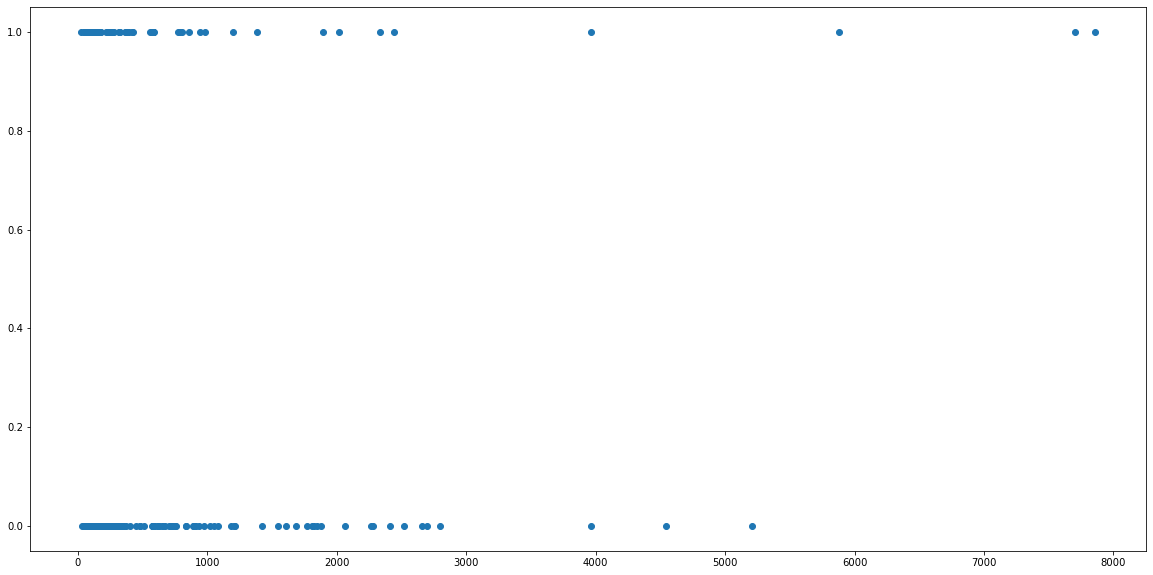

In [15]:
plt.figure(figsize=(20,10))
plt.plot(heart.creatinine_phosphokinase,heart.DEATH_EVENT,'o')

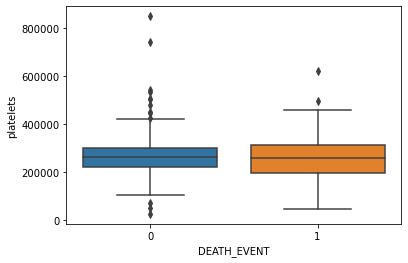

In [16]:
sns.boxplot(x = "DEATH_EVENT",y = "platelets",data=heart)

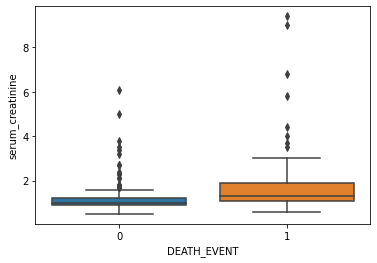

In [17]:
sns.boxplot(x = "DEATH_EVENT",y = "serum_creatinine",data=heart)

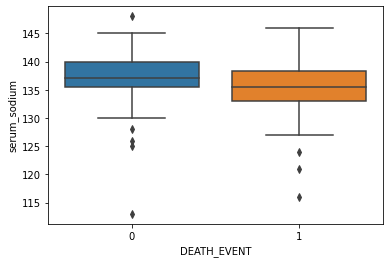

In [18]:
sns.boxplot(x = "DEATH_EVENT",y = "serum_sodium",data=heart)

In [14]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [16]:
Xs = heart.drop(['time','DEATH_EVENT','anaemia_high_blood'],axis=1)
# The reason we remove 'time' column is, this variable is not useful when we want to use our model as a 
# predictive model in the future. 
Y = heart['DEATH_EVENT']

In [68]:
#Use 3/4 data as train dataset, 1/4 data as valid dataset
xTrain,xVald,yTrain,yVald = train_test_split(Xs,Y,train_size = 0.7,random_state = 2)

In [69]:
#Apply logistic regression model
logmodel = LogisticRegression()
logmodel.fit(xTrain,yTrain)

LogisticRegression()

In [70]:
predictions = logmodel.predict(xVald)

In [71]:
conf = confusion_matrix(yVald,predictions)
print(np.around((conf[0,0] + conf[1,1])/conf.sum(),3))

0.789


In [72]:
#Apply random forests model
from sklearn.ensemble import RandomForestClassifier

In [77]:
rfc = RandomForestClassifier(n_estimators=200)

In [78]:
rfc.fit(xTrain,yTrain)

RandomForestClassifier(n_estimators=200)

In [79]:
rfc_predict = rfc.predict(xVald)

In [80]:
rfc_conf = confusion_matrix(yVald,rfc_predict)
print(np.around((rfc_conf[0,0] + rfc_conf[1,1])/rfc_conf.sum(),3))

0.811


In [85]:
#Apply Support Vector Machines model
from sklearn.svm import SVC

In [86]:
svm = SVC()

In [87]:
svm.fit(xTrain,yTrain)

SVC()

In [88]:
svm_predict = svm.predict(xVald)

In [89]:
svm_conf = confusion_matrix(yVald,svm_predict)
print(np.around((svm_conf[0,0] + svm_conf[1,1])/svm_conf.sum(),3))

0.733


Given the same training and validation dataset, Random Forests model has the best predict accuracy, which is $81.1\%$.